In [130]:
#importing Libraries
import pandas as pd
import seaborn as sns

In [131]:
# Reading data from csv file into dataframe
df= pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [132]:
# Data Summary
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


Q12: From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?

In [88]:
#select the sample and visualizing it on a regression plot
simple_linear_reg_df = df[['T2', 'T6']].sample(15, random_state=3)

<AxesSubplot:xlabel='T2', ylabel='T6'>

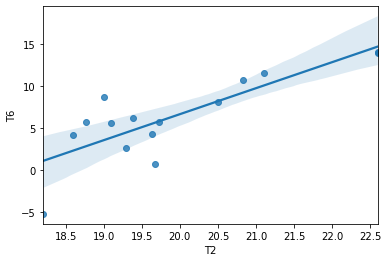

In [89]:
#regression plot
sns.regplot(x="T2", y="T6",data=simple_linear_reg_df)

In [135]:
x = df[['T2']] #Temperature in the living room
y = df[['T6']] #Temperature outside the building

#fit the model
linear_model = LinearRegression()
linear_model.fit(x, y)

#obtain predictions
predicted_values = linear_model.predict(x)

#R^2 Value
from sklearn.metrics import r2_score
r2_score = r2_score(y, predicted_values)
print(f' r-squared= {round(r2_score, 2 )}; This shows that 64% of the data fits the model')

 r-squared= 0.64; This shows that 64% of the data fits the model


Question 13: Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:
What is the Mean Absolute Error (in two decimal places)?

In [136]:
df1 = df.drop(columns=['date','lights']) #Droping date and light column and assigning it to a new data frame(df1)


In [137]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns) #normalising the dataset using MinMaxScaler

In [138]:
features_df = normalised_df.drop(columns=['Appliances'])
heating_target = normalised_df['Appliances']

In [139]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,test_size=0.3, random_state=42)

In [143]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

#fit the model to the training dataset
model= linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
print(f' mean_absolute_error= {round(mae, 2 )}; This shows, we can expect 5% of error difference between actual value and the predicted value')

 mean_absolute_error= 0.05; This shows, we can expect 5% of error difference between actual value and the predicted value


Question 14: What is the Residual Sum of Squares (in two decimal places)?

In [146]:
#### Residual Sum of Squares (RSS)
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2) 
print(f' RSS= {round(rss, 2 )}; This measures 45.35 variance in the data set that is not explained by the regression model.')

 RSS= 45.35; This measures 45.35 variance in the data set that is not explained by the regression model.


Queston 15: What is the Root Mean Squared Error (in three decimal places)?

In [148]:
#root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
print(f' RMSE= {round(rmse, 3 )}; this tells you how concentrated the data is around the line of best fit..')

 RMSE= 0.088; this tells you how concentrated the data is around the line of best fit..


Question 16: What is the Coefficient of Determination (in two decimal places)?

In [151]:
#R-Squared or coeficient of determination
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
print(f'coeficient of determination= {round(r2_score, 2 )}; This shows that 15% of the data fits the model')

coeficient of determination= 0.15; This shows that 15% of the data fits the model


Question 17:Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [152]:
#Regularization
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [153]:
#Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [154]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [117]:
linear_model_weights = get_weights_df(model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.456698,-0.401134,-0.000000
1,T_out,-0.321860,-0.250765,0.000000
2,T2,-0.236178,-0.193880,0.000000
3,T9,-0.189941,-0.188584,-0.000000
4,RH_8,-0.157595,-0.156596,-0.000110
5,RH_out,-0.077671,-0.050541,-0.049557
6,RH_7,-0.044614,-0.046291,-0.000000
7,RH_9,-0.039800,-0.041701,-0.000000
8,T5,-0.015657,-0.020727,-0.000000
9,T1,-0.003281,-0.021549,0.000000


from the table above, we can deduce that the features with highest weight and lowers weight as RH_2 and RH_1 respectively.

Question 18:Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [158]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4) # assigning 0.4 to rige regression model
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [165]:
#obtain predictions
ridge_predicted_values = ridge_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, ridge_predicted_values))
print(f'RMSE= {round(rmse, 3 )}; Theres no change in the root mean square')

RMSE= 0.088; Theres no change in the root mean square


Question 19:Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [162]:
lasso_reg = Lasso(alpha=0.001)# assigning 0.001 to aplha in lasso model
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [163]:
linear_model_weights = get_weights_df(model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.456698,-0.411071,-0.000000
1,T_out,-0.321860,-0.262172,0.000000
2,T2,-0.236178,-0.201397,0.000000
3,T9,-0.189941,-0.188916,-0.000000
4,RH_8,-0.157595,-0.156830,-0.000110
5,RH_out,-0.077671,-0.054724,-0.049557
6,RH_7,-0.044614,-0.045977,-0.000000
7,RH_9,-0.039800,-0.041367,-0.000000
8,T5,-0.015657,-0.019853,-0.000000
9,T1,-0.003281,-0.018406,0.000000


from the above table, the number of non nan value is 4

Question 20: What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)

In [168]:
lasso_predicted_values = lasso_reg.predict(x_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predicted_values))
round(lasso_rmse, 3) 
print(f'RMSE= {round(rmse, 3 )}')

RMSE= 0.088
